# Example notebook for using RS propagation from propagate module 

In the following we exemplify Rayleigh-Sommerfeld (RS) propagation from elements via the ``generate`` module illuminated with plane waves, using the ``propagate`` module. In particular:
* Several examples of RS propagations in Z axis, YZ and XY planes:
    * RS propagation from elements defined from library functions apertures (e.g. Fresnel lenses)
    * RS propagation from elements defined from arbitrarily defined functions (e.g. Spiral Phase Plate)

In the ``propagate`` module, Rayleigh-Sommerfeld propagation is implemented via direct numerical integration of a double integral (see, e.g. Goodman Fourier Optics textbook as reference), making it (very) time-consuming, yet exact. 

Fresnel and Fraunhofer propagations provide acceptable approximations with faster computation for the propagation in some ranges. In the ``propagate`` module these approximations have been implemented following the Goodman Fourier Optics textbook. For simple use examples of Fresnel and Fraunhofer propagations check propopt package https://github.com/cunhaJ/propopt .
    

In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 

## RS propagation from a circular aperture

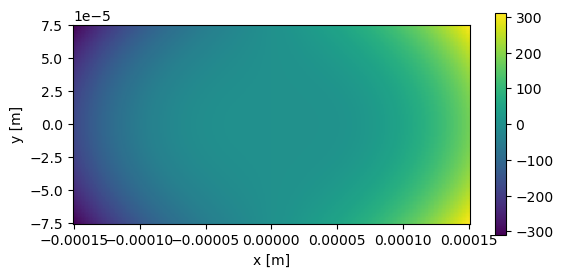

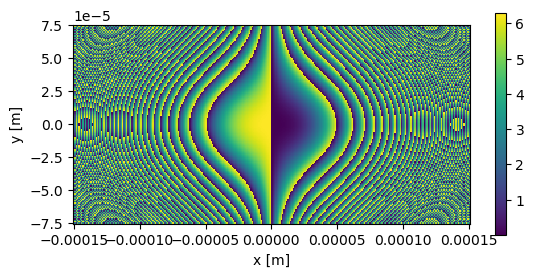

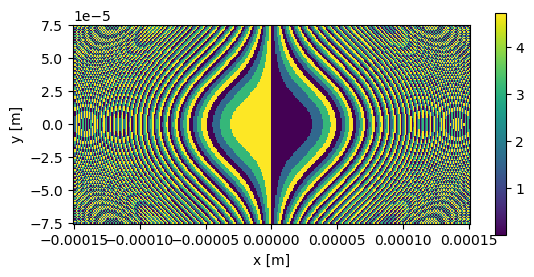

In [2]:




#attention, make sure to have enough pixels 
npix = 1000  # number of pixels 
xsiz = 1000 #x-size 
ysiz = 1000 #y-size 
ltop = 1 #topological number

aperture_width = 300*micro
aperture_height = 150*micro
x_pixel = 300
y_pixel = 150

f1 = 100*micro
f2 = 500*micro
tuning_distance = 150*micro
wavelength = 532*nano

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)
moe.plotting.plot_aperture(mask)


# Truncating the phase mask at multiples of 2π
mask.modulos(2*np.pi)

moe.plotting.plot_aperture(mask) 


n = 4 # number of discrete levels 

mask.discretize(n)
moe.plotting.plot_aperture(mask) 



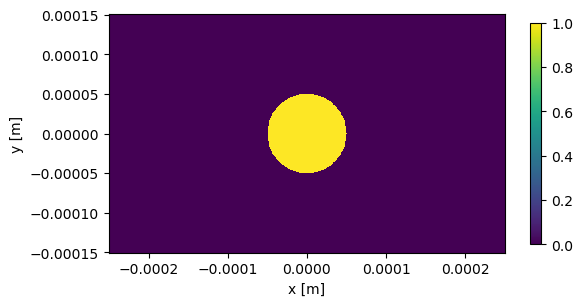

In [3]:
#make circular apertures (returns also the 2D array)

aperture_width = 500*micro
aperture_height = 300*micro
x_pixel = 501
y_pixel = 301

radius = 50*micro
rd = 1000e-9 #m 
E0=1 
 
# pixsize = 0.1 * lda
 

# partial = rd/(pixsize * npix)

mask = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)

# Create circular aperture on mask

#center = (-xsiz/npix/2, -ysiz/npix/2) 
mask = moe.generate.circular_aperture(mask, radius=radius)

moe.plotting.plot_aperture(mask)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


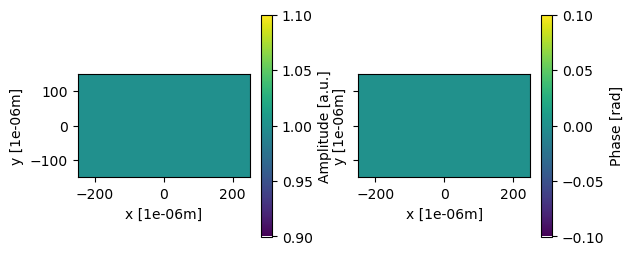

<Figure size 640x480 with 0 Axes>

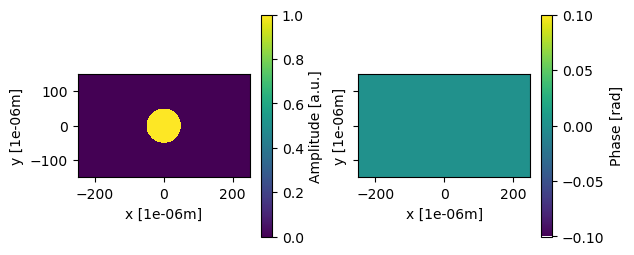

In [20]:
%load_ext autoreload
%autoreload 2

import pyMOE as moe
# field = moe.field.create_empty_field_from_aperture(mask)

field = moe.field.create_empty_field(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)

field = moe.field.generate_gaussian_field(field, E0=1, w0=50*micro)
field = moe.field.generate_uniform_field(field, E0=1)
moe.plotting.plot_field(field, scale=micro)

plt.figure()
field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=None)

field.field
moe.plotting.plot_field(field, scale=micro)
# plt.imshow(np.abs(field.field))

In [21]:
%load_ext autoreload
%autoreload 2




screen = moe.field.create_screen_XY(-1,1, 11, -1,1, 11, z=100*micro)

screen = moe.propagate.RS_integral(field, screen, 1550e-9, scheduler=True)

screen.YY.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[########################################] | 100% Completed | 3.17 sms


(11, 11, 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


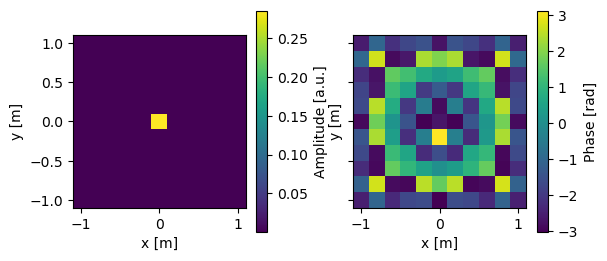

In [22]:
%load_ext autoreload
%autoreload 2
moe.plotting.plot_screen_XY(screen)

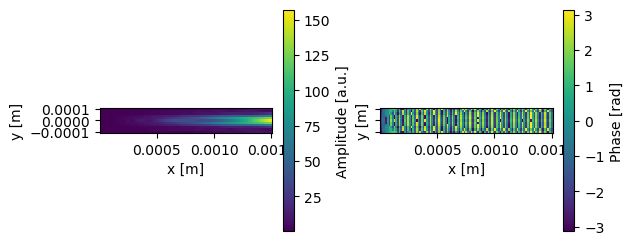

In [12]:
screen_YZ = moe.field.create_screen_YZ(-100*micro,100*micro, 11, 10*micro, 1500*micro, 101)
screen_YZ = moe.propagate.RS_integral(field, screen_YZ, 1550e-9, scheduler=True)

moe.plotting.plot_screen_YZ(screen_YZ)

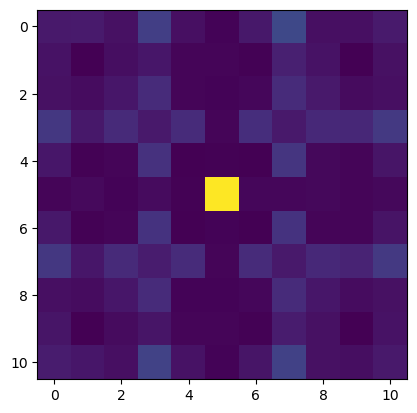

In [40]:
plt.imshow(np.abs(screen.screen)**2)

In [44]:
results = []

@delayed
def task(i,j):
    return i*10000+j


for i in range(100):
    for j in range(1000):
        results.append(task(i,j))



results = dask.compute(*results)


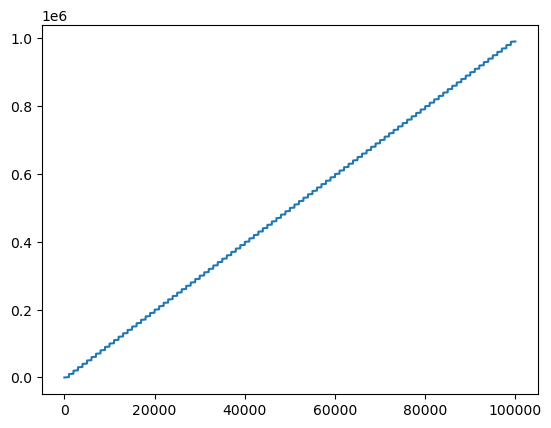

In [46]:
plt.plot(results)

In [15]:
import dask.array as da


UsageError: Line magic function `%%time` not found.


In [28]:
%%time
xd = da.random.normal(10, 0.1, size=(1_000, 1_000))

z = da.zeros(xd.shape)
yd = xd.mean(axis=0)
yd.compute()


z.compute()


Wall time: 59 ms


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
xd.chunksize

(3750, 3750)

In [6]:
%autoreload 2
screen = moe.field.create_screen_XY(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel, z=100*micro)
# create_screen_YZ(ymin, ymax, N_y, zmin, zmax, N_z, x=0)

In [15]:
a = np.array([[1,2],[2,4]])
len(a), a.shape

(2, (2, 2))

In [8]:
x = np.linspace(0,10,10)
y = np.linspace(0,20,10)
z = np.linspace(0,30,10)
z=0

XX,YY,ZZ = np.meshgrid(x,y,z)

XX.shape,np.ones(XX.shape)

((10, 10, 1),
 array([[[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         [1.],
        

In [ ]:
from scipy import integrate

def simpson2d(f,ax,bx,ay,by):
    """
    Implements Simpson method for calculating a double integral in 2D array f
    
    Arguments: 
        :f:         2D array to calculate integral 
        :[ax, bx]:  limits of integration in x, [lower, upper]
        :[ay, by]:  limits of integration in y, [lower, upper]



        #https://d-arora.github.io/Doing-Physics-With-Matlab/mpDocs/math_integration_2D.pdf
    """
    
    num = len(f)
    hx = (bx-ax)/(num-1)
    hy = (by-ay)/(num-1)
    h = hx * hy / 9

    # Simpson coefficients 
    #1 4 2 4 ...2 4 1
    sc = 2*np.ones(num)
    sc[np.arange(1,num-1,2)] = 4
    sc[0] = 1
    sc[num-1] = 1
    #print(sc)

    scx = np.meshgrid(sc,sc)[0]
    scxy = np.ones((num,num))
    scxy[np.arange(1,num-1,2,dtype=int),:] = scx[np.arange(1,num-1,2,dtype=int),:]*sc[1]
    scxy[np.arange(2,num-2,2, dtype=int),:] = scx[np.arange(2,num-2,2,dtype=int),:]*sc[2]
    scxy[0,:] = sc
    scxy[num-1,:] = sc
    
    #print(scxy)

    # integral    
    tint = h * np.sum(np.sum(scxy * f))
    
    return tint

i1 = simpson2d(field.field, field.x.min(), field.x.max(),field.y.min(), field.y.max())
i2 = integrate.simpson(integrate.simpson(field.field, field.x),field.y)
i1,i2

ValueError: operands could not be broadcast together with shapes (301,301) (301,501) 

In [ ]:
a
fmask = mask.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask.XX**2+mask.YY**2>(xsiz*partial)**2 ) ] =0

##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [6]:
####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = lda 
zmax = 0.2*zdist
nzs = 200
xplus = xsiz/2
xminus = -xplus  

RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:30.650153


<IPython.core.display.Javascript object>


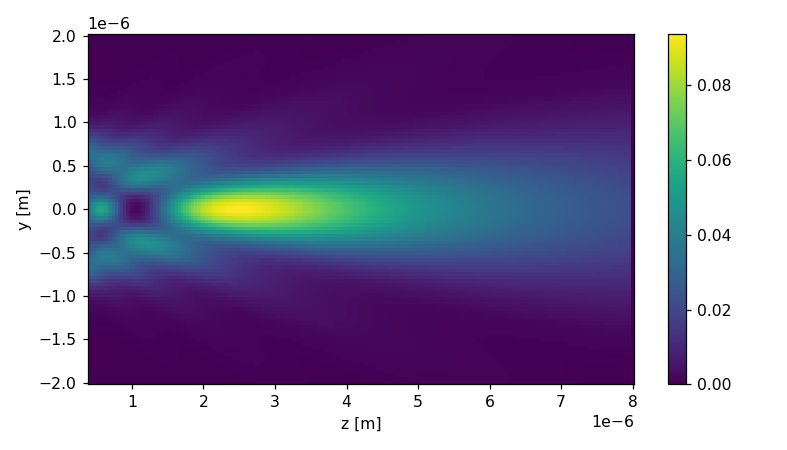

In [42]:
##Plot the YZ propagation 
fig = plt.figure(figsize=(7,4)) 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z)**2)
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()

## RS propagation from a Fresnel multilevel mask example #1

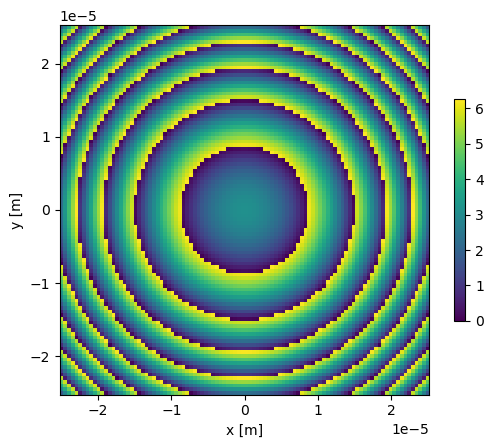

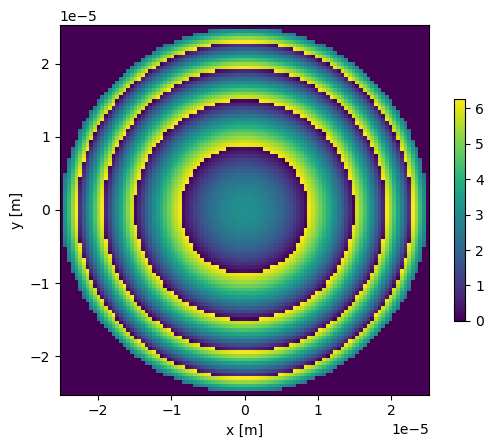

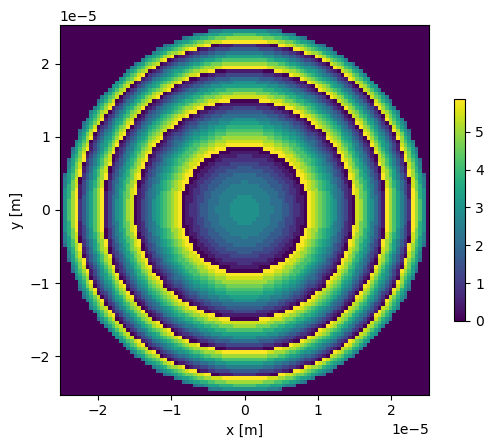

Text(0, 0.5, 'y (pixels)')

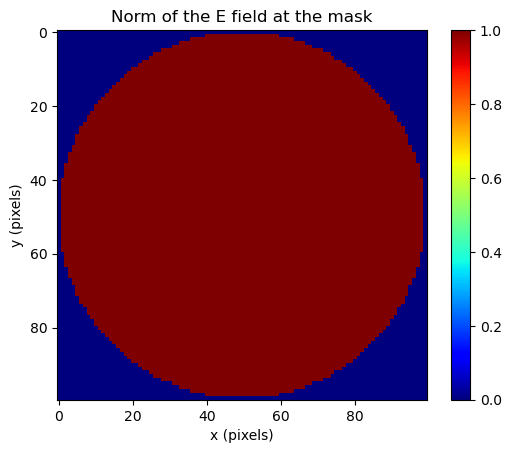

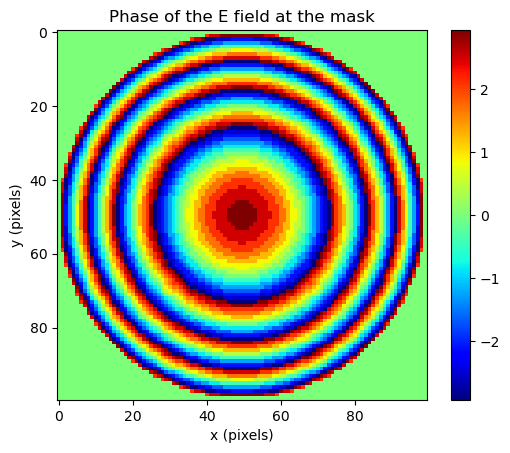

In [16]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 50e-6 #xsize in m 
ysiz = 50e-6
pixsize = 1e-6 #m
lda = 500e-9 #m
foc = 150e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")


In [6]:
##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 

Progress: [####################] 100.0%
Elapsed: 0:00:17.281729


<IPython.core.display.Javascript object>


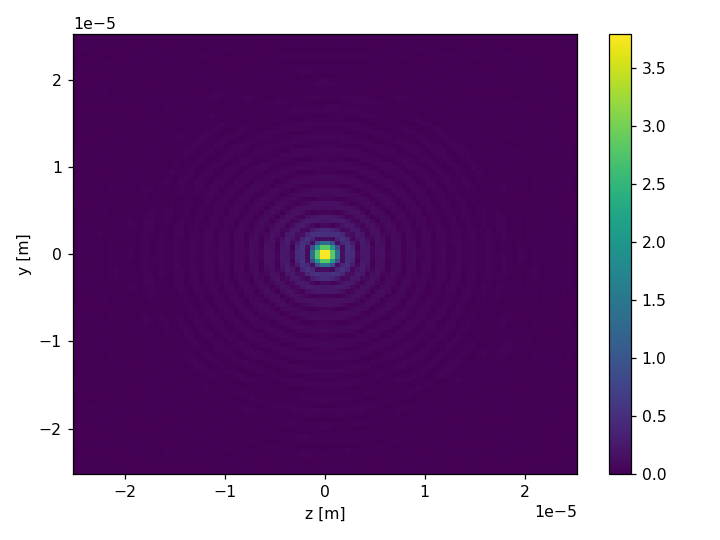

In [7]:
fig = plt.figure() 

xp = np.linspace(xminus,xplus,npix)
yp = xp

plt.pcolormesh(xp,yp,np.abs(z1) )

plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()
plt.colorbar()
plt.savefig("FresnelN16-XY.png")

In [21]:
unit = np.ones((100,10), dtype=complex)
len(unit)

100

In [18]:

%autoreload 2
####Propagate field and calculate in plane YZ, using 100 bins in Y
nxcuts = 10
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] #E field 

num 100s: [--------------------] 0.0%
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
num 100
nu

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


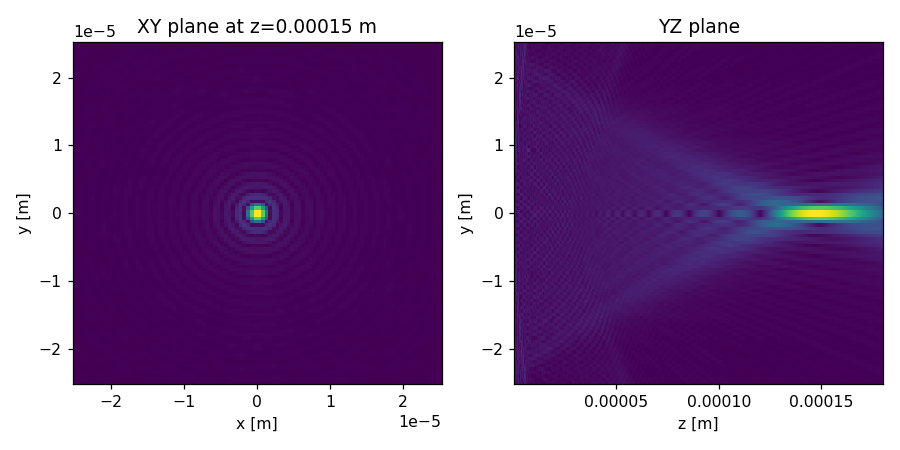

In [9]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

In [10]:
##Propagate field using RS integral using smaller bins 
#-> Results in a faster calculation just for fast inspection, however, use with care, due to possible bluring effects
nxcuts = 25

##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, nxcuts, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 


RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:00.863262
Progress: [####################] 100.0%
Elapsed: 0:00:23.457230


<IPython.core.display.Javascript object>


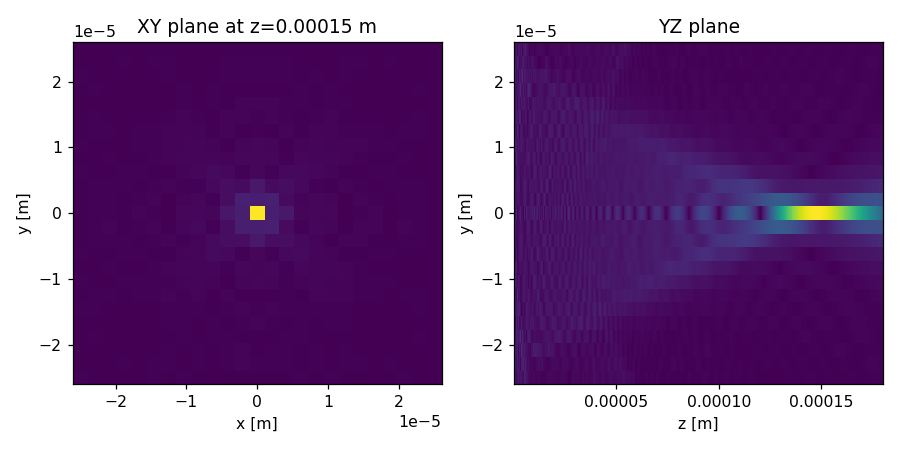

In [11]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

## RS propagation from a Fresnel multilevel mask example #2

<IPython.core.display.Javascript object>


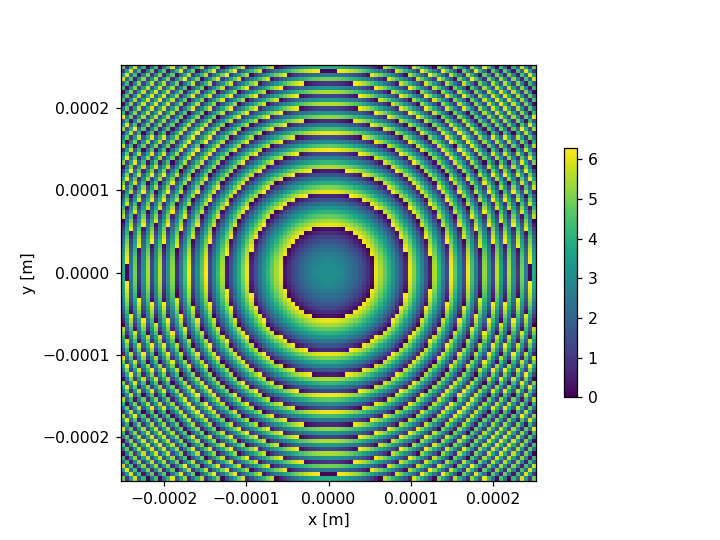

<IPython.core.display.Javascript object>


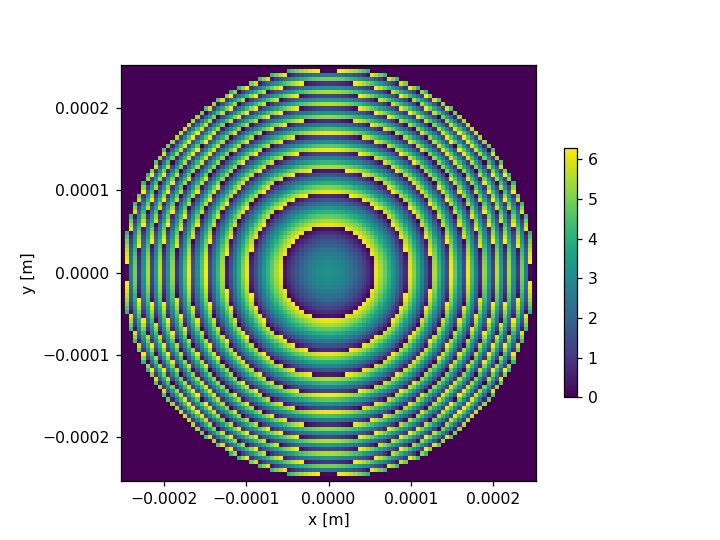

<IPython.core.display.Javascript object>


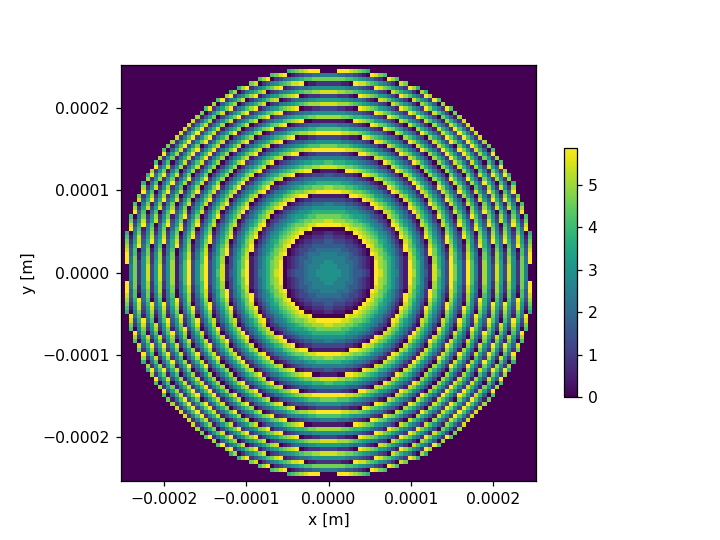

<IPython.core.display.Javascript object>


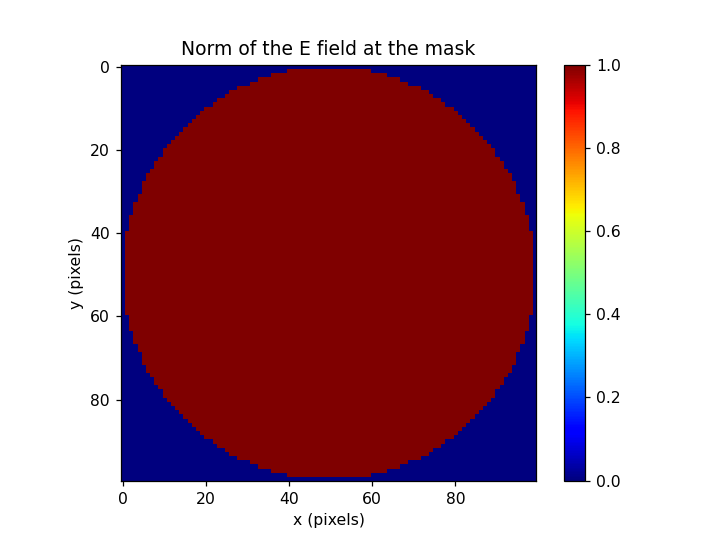

<IPython.core.display.Javascript object>


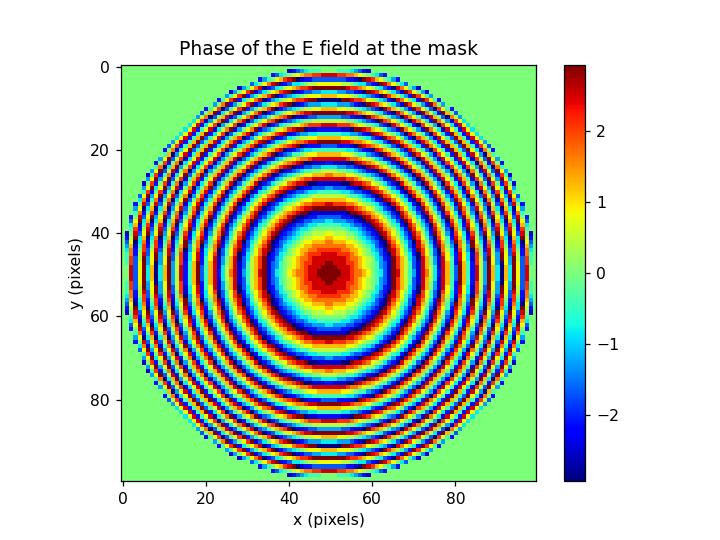

Text(0, 0.5, 'y (pixels)')

In [12]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 500e-6 #xsize in m 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [13]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix*4, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

nxcuts = npix
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:03:16.181333
Progress: [####################] 100.0%
Elapsed: 0:01:41.389211


<IPython.core.display.Javascript object>


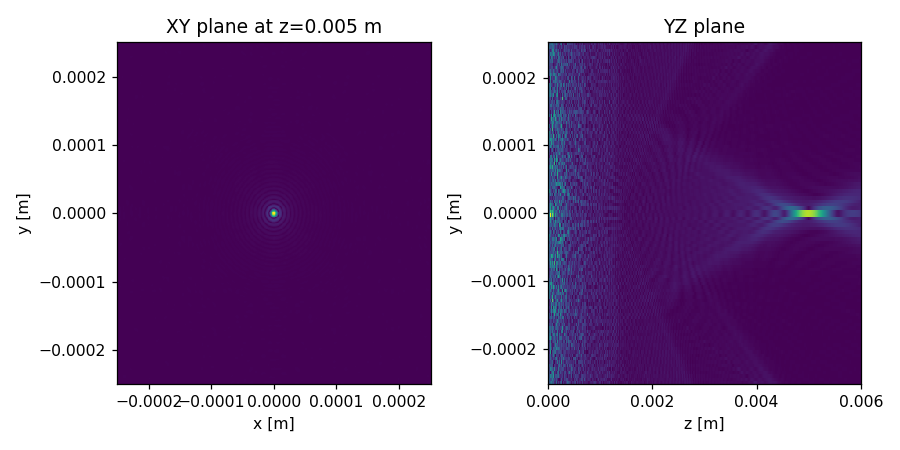

In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

<IPython.core.display.Javascript object>


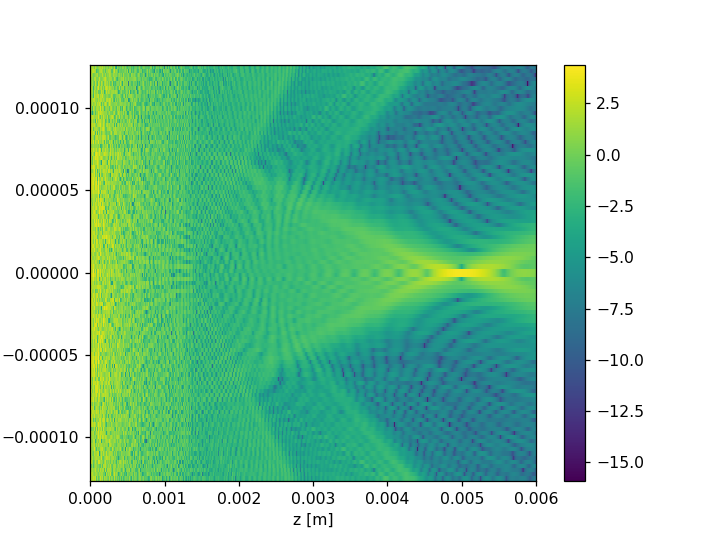

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [15]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(-xplus/2,xplus/2,npix)
z = RS_results[0]

plt.pcolormesh(zp,yp,np.log(np.abs(z2)**2) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("Zoom-YZ-log-representation.png")

## RS propagation from a Fresnel Zone Plate

../..\pyMOE\plotting.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


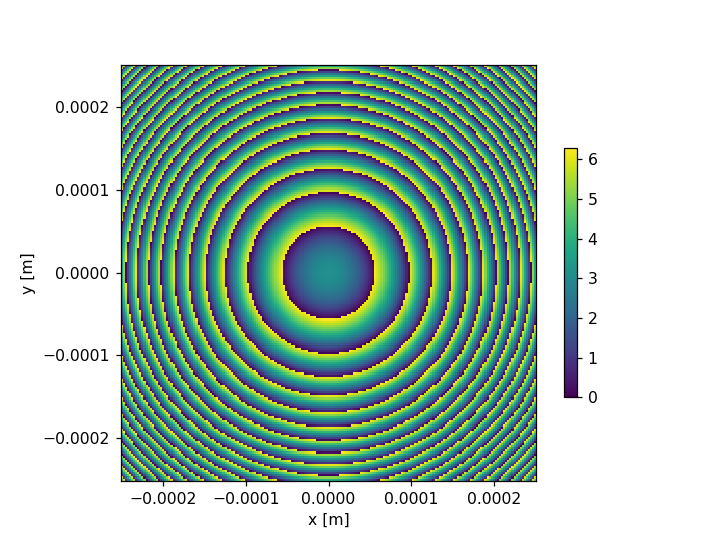

<IPython.core.display.Javascript object>


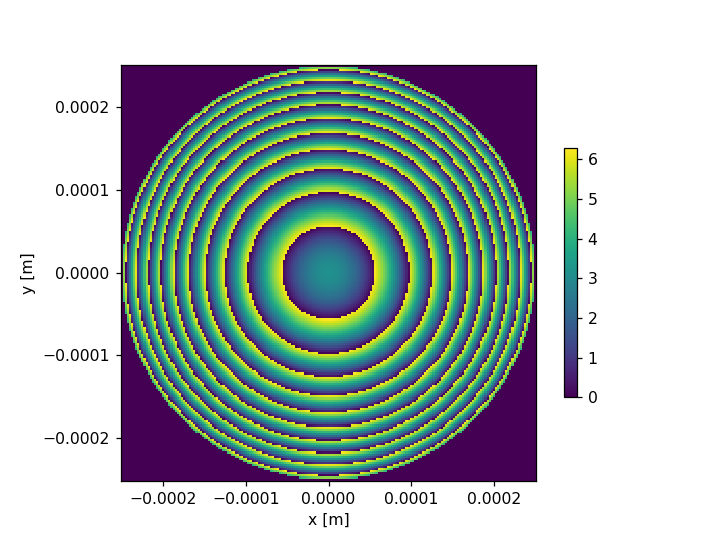

<IPython.core.display.Javascript object>


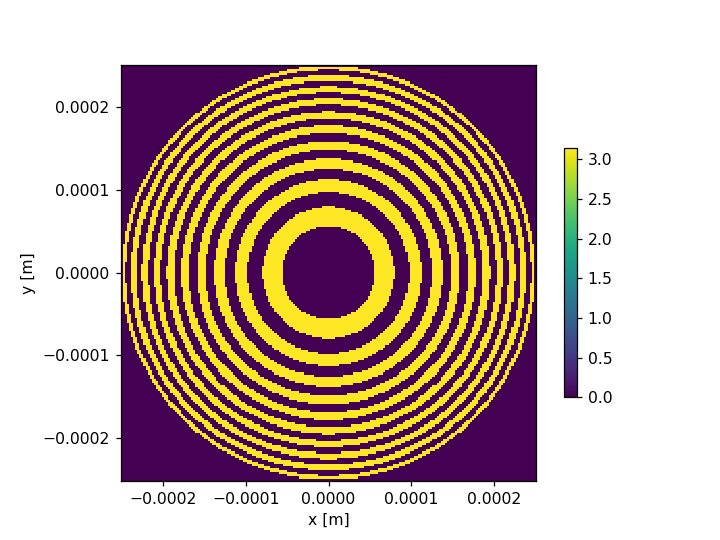

<IPython.core.display.Javascript object>


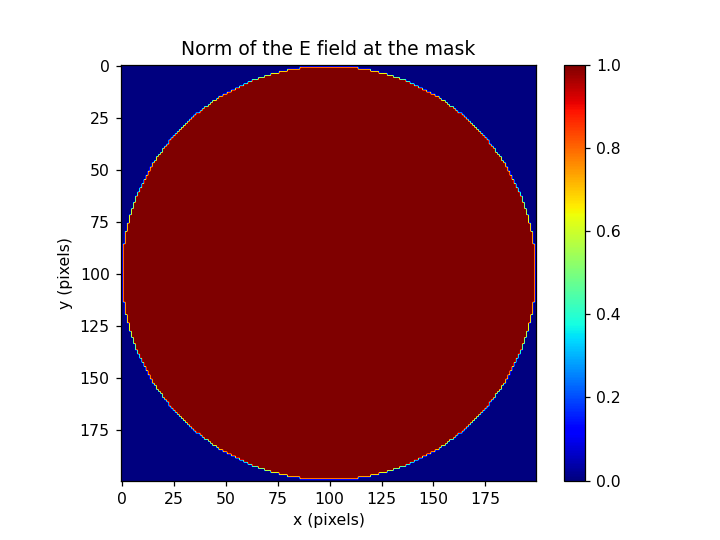

<IPython.core.display.Javascript object>


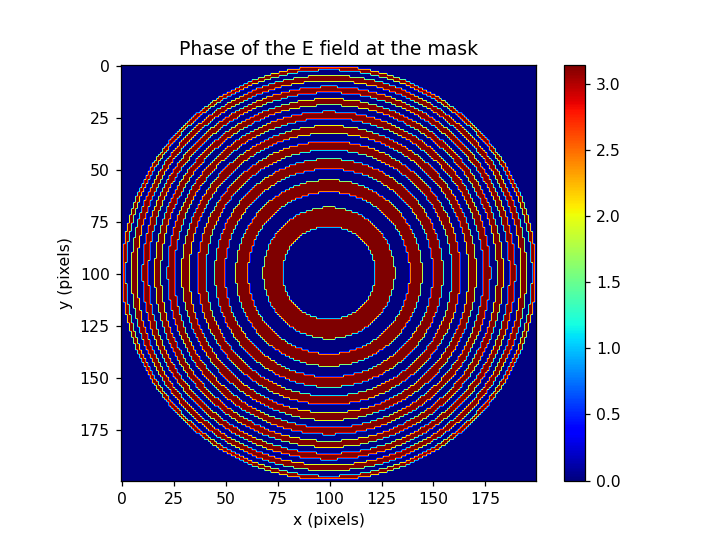

Text(0, 0.5, 'y (pixels)')

In [16]:
####generate a fresnel zone plate 
#number of pixels 
npix = 200

#size of the rectangular mask 
xsiz = 500e-6 #xsize in m 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= 256

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = [ 0, np.pi]

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [17]:
##Propagate field using RS integal 
RS_results2 = moe.propagate.RS_intZZ(zmin,zmax,nzs,0,0, Em, npix, pixsize, npix, xplus, xplus, lda,1, verbose=True)
field2 = RS_results2[2] ##Intensity log 


Progress: [####################] 100.0%
Elapsed: 0:00:01.493110


<IPython.core.display.Javascript object>


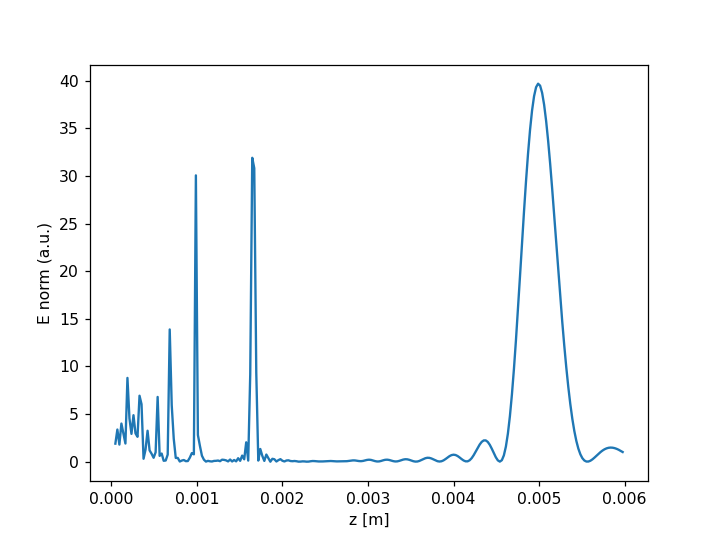

In [18]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
ef = RS_results2[1]

plt.plot(zp[2:-1],ef[2:-1])
plt.xlabel("z [m]")
plt.ylabel("E norm (a.u.)")

plt.savefig("FZP-Zprop.png")


In [19]:
####Propagate field and calculate in plane YZ, using npix bins in Y
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:03:57.074237


<IPython.core.display.Javascript object>


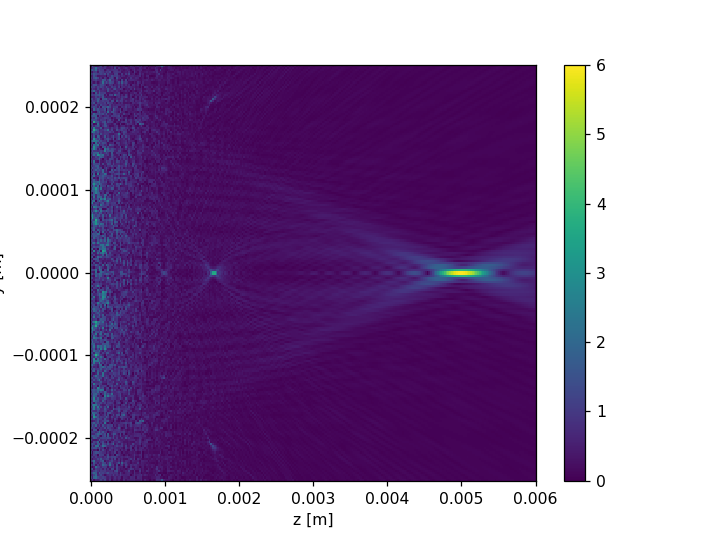

In [20]:
##Plot the YZ propagation 
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("FresnelN2-YZ.png")

## RS propagation from a Spiral Phase Plate

<IPython.core.display.Javascript object>


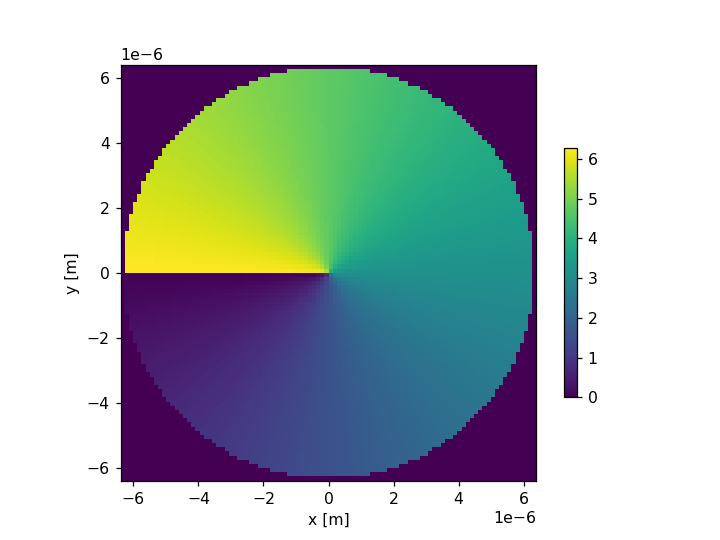

<IPython.core.display.Javascript object>


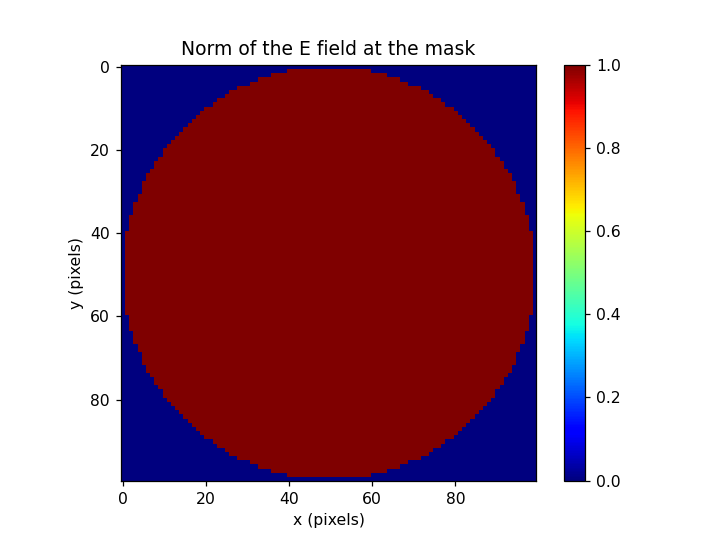

<IPython.core.display.Javascript object>


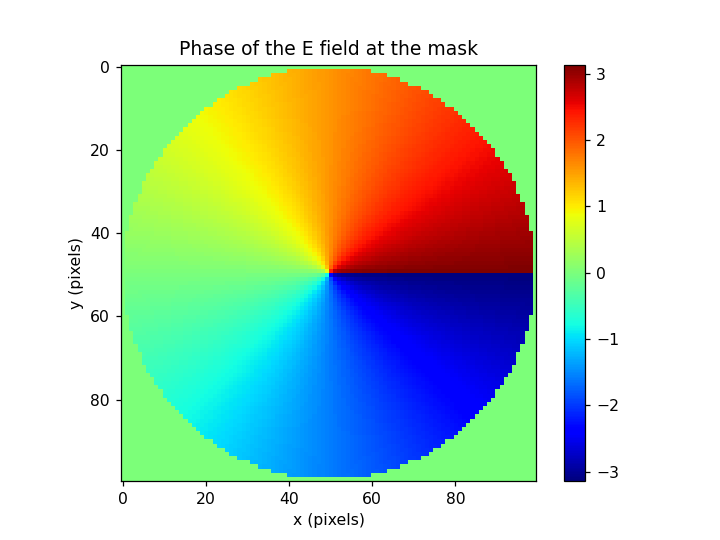

Text(0, 0.5, 'y (pixels)')

In [21]:
####Spiral Phase plate 

####generate a fresnel zone plate 
npix =100 # nr of pixels 
lda = 632.8e-9 #wavelength in m 
foc = 100*lda # focal distance in m
xsiz = 20*lda  #x-size in m 
ysiz = 20*lda #y-size in m
pixsize = xsiz/npix

xplus=xsiz/2
xminus = -xplus 

ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)
    
def spiral(x,y,x0,y0,L):
    """
    returns a spiral COMPLEX PHASE with input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center of the lens 
    y0 = y-coordinate of center of the lens
    L = topological charge 
    """

    theta = np.arctan2((y-y0),(x-x0))
    sp = np.exp(1.0j*L*theta)
    return sp
    

n =10 # number of gray levels 

center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=ltop)
mask.aperture = mask.aperture + np.pi 

mask.aperture[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0 
moe.plotting.plot_aperture(mask)

fmask = mask.aperture

Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [22]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

Progress: [####################] 100.0%
Elapsed: 0:00:11.529555


<IPython.core.display.Javascript object>


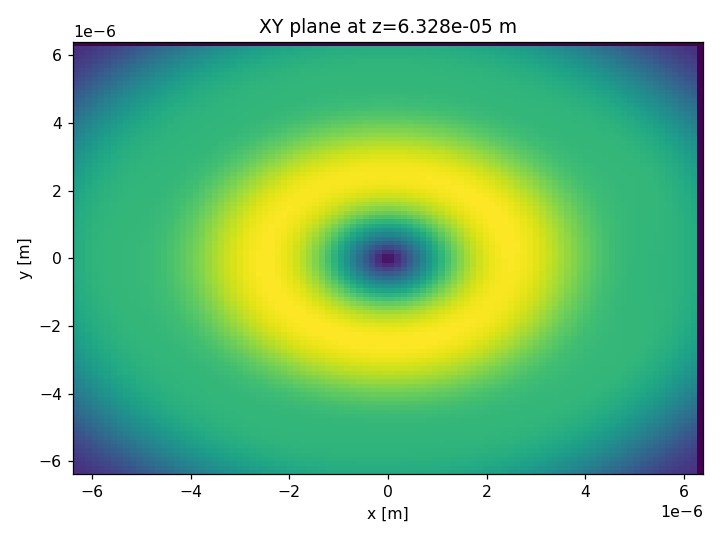

In [23]:
fig = plt.figure()

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])


plt.pcolormesh(xp1,yp1,np.abs(z1) )
plt.title('XY plane at z='+str(foc)+' m')

plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.tight_layout()

In [24]:
####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = lda
zmax = 2*foc
nzs=500
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:58.787410


<IPython.core.display.Javascript object>


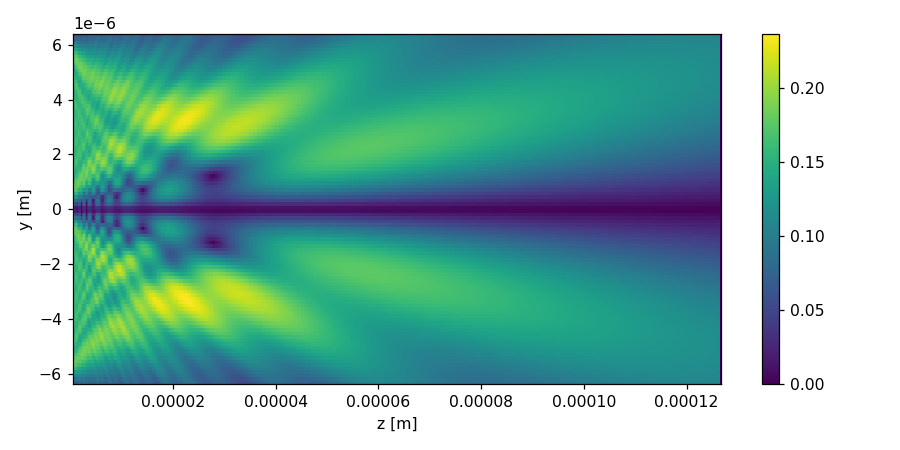

In [25]:
##Plot the YZ propagation 
fig = plt.figure(figsize=(8,4)) 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()

plt.savefig("Spiral-YZ.png")